# Chapter 4 Problem 10

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.discrete.discrete_model as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import patsy as pt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier

import statsmodels.api as sm 
from patsy import dmatrices
from sklearn import preprocessing
from sklearn import utils

In [4]:
df = pd.read_csv('data/Weekly.csv')

In [5]:
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [7]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


## Part a

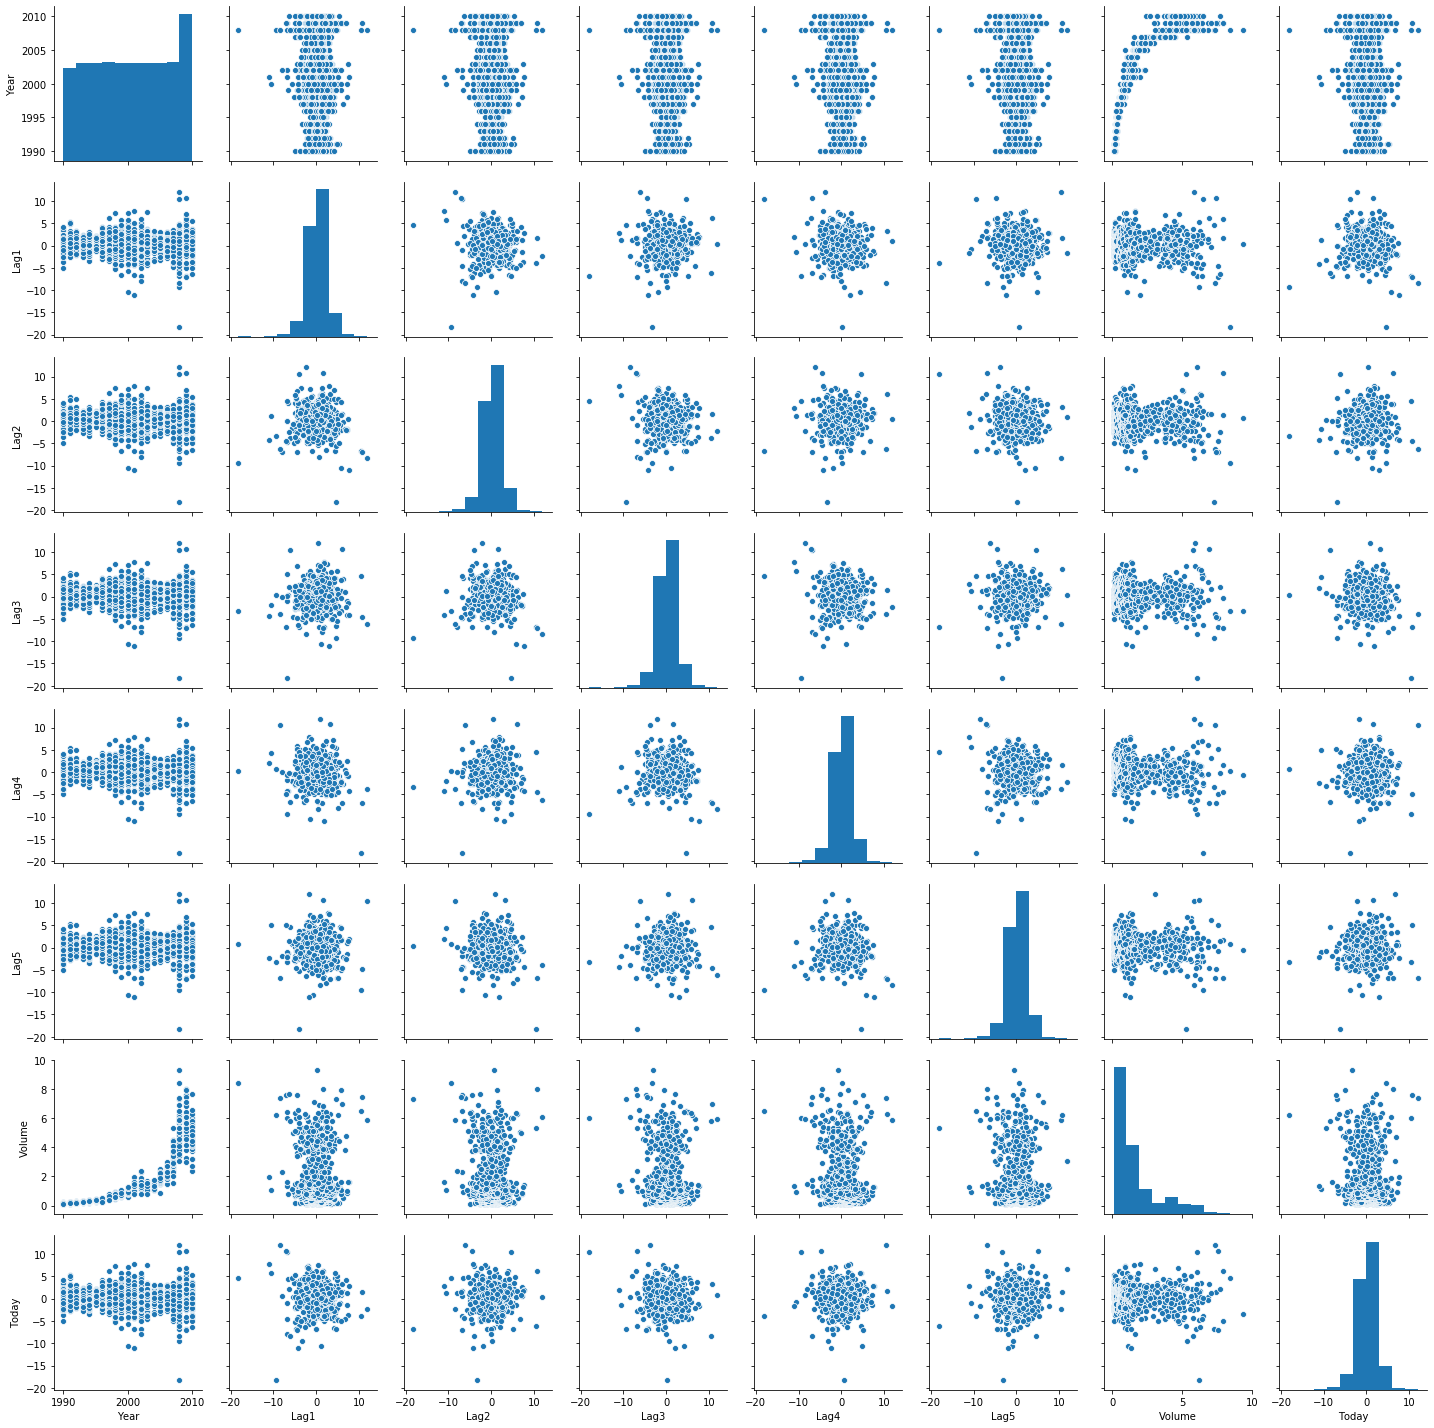

In [8]:
sns.pairplot(df)

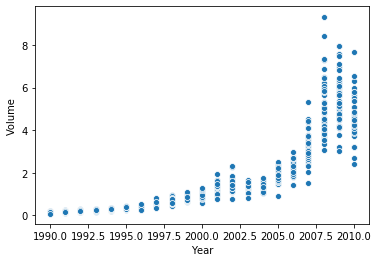

In [9]:
sns.scatterplot(x = 'Year',y='Volume',data = df)

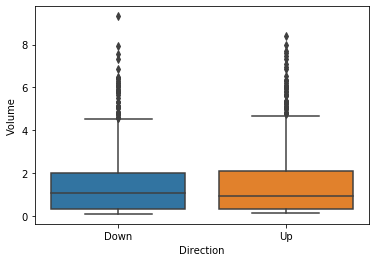

In [10]:
sns.boxplot(x = 'Direction',y='Volume',data = df)

## Part b

In [11]:
df['Direction'] = df['Direction'].map({'Down':0, 'Up':1})
y, x = pt.dmatrices('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=df, return_type='dataframe')
df['Direction']

0       0
1       0
2       1
3       1
4       1
       ..
1084    1
1085    1
1086    1
1087    1
1088    1
Name: Direction, Length: 1089, dtype: int64

In [12]:
lr = LogisticRegression()
training_columns = ['Lag1','Lag2','Lag3','Lag4','Lag5','Volume'] 
model = lr.fit(df[training_columns], df['Direction'])

/Users/jacobadkins1/.conda/envs/ISLR/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print('Model Intercept: ',model.intercept_)
print('Model Coefficients:',model.coef_[0])

Model Intercept:  [0.26484745]
Model Coefficients: [-0.04117292  0.05846974 -0.01599122 -0.02769998 -0.01440289 -0.02212844]


In [14]:
sm_model = sm.Logit(y,x)
sm_model_results = sm_model.fit()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


In [15]:
sm_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Fri, 03 Jan 2020   Pseudo R-squ.:                0.006580
Time:                        20:34:14   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag2 apears to be a predictor with statistical significant.

## Part c

In [19]:
conf_mat = metrics.confusion_matrix(df['Direction'], lr.predict(df[training_columns]))
print(conf_mat)

[[ 55 429]
 [ 47 558]]


In [20]:
lr.score(df[training_columns],df['Direction'])

0.5629017447199265

## part d

In [27]:
df_1990_2008 = df[(df['Year'] >= 1990) & (df['Year'] <= 2008)]
df_2009_2010 = df[(df['Year'] > 2008)]

In [147]:
x = df_1990_2008['Lag2']
x = x.values.reshape(-1,1)
y = df_1990_2008['Direction']





In [148]:
model_a = lr.fit(x,y)

/Users/jacobadkins1/.conda/envs/ISLR/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [150]:
x_test = df_2009_2010['Lag2'] 
y_test = df_2009_2010['Direction'] 
x_test = x_test.values.reshape(-1,1)
#y_test = y_test.values.reshape(-1,1)


metrics.confusion_matrix(y_test,model_a.predict(x_test))

array([[ 9, 34],
       [ 5, 56]])

In [153]:
model_a.score(x_test,y_test)

0.625

## Part e

In [156]:
lda = LinearDiscriminantAnalysis()
model_b = lda.fit(x,y)


In [160]:
metrics.confusion_matrix(y_test,model_b.predict(x_test))

array([[ 9, 34],
       [ 5, 56]])

In [161]:
model_b.score(x_test,y_test)

0.625

## Part f

In [164]:
qda = QuadraticDiscriminantAnalysis()
model_c = qda.fit(x,y)
metrics.confusion_matrix(y_test,model_c.predict(x_test))

array([[ 0, 43],
       [ 0, 61]])

In [165]:
model_c.score(x_test,y_test)

0.5865384615384616

## Part g

In [168]:
knn = KNeighborsClassifier(n_neighbors=1)
model_d = knn.fit(x,y)

In [169]:
metrics.confusion_matrix(y_test,model_d.predict(x_test))

array([[21, 22],
       [31, 30]])

In [170]:
model_d.score(x_test,y_test)

0.49038461538461536

## Part h

Logistic Regression and LDA performed the best.

## Part i

In [172]:
knn10 = KNeighborsClassifier(n_neighbors=10)
model_e = knn10.fit(x,y)

In [174]:
metrics.confusion_matrix(y_test,model_e.predict(x_test))

array([[22, 21],
       [24, 37]])

In [173]:
model_e.score(x_test,y_test)

0.5673076923076923